# Basic Statistics

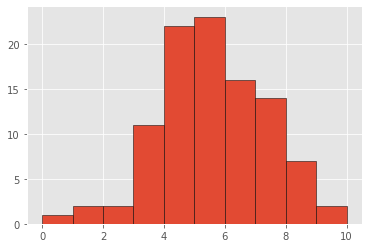

In [7]:
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

np.random.seed(1)
data = np.round(np.random.normal(5,2,100))
plt.hist(data, bins=10, range=(0,10), edgecolor = 'black') #bins= width of bar. Lower the value, thinner the bars.
plt.show()

In [9]:
print(data)             #numpy.random.normal(loc = 0.0, scale = 1.0, size = None) :
print(len(data))        #creates an array of specified shape and fills it with random values 

[8. 4. 4. 3. 7. 0. 8. 3. 6. 5. 8. 1. 4. 4. 7. 3. 5. 3. 5. 6. 3. 7. 7. 6.
 7. 4. 5. 3. 4. 6. 4. 4. 4. 3. 4. 5. 3. 5. 8. 6. 5. 3. 4. 8. 5. 4. 5. 9.
 5. 6. 6. 4. 3. 4. 5. 6. 7. 7. 6. 7. 3. 8. 6. 4. 6. 5. 7. 8. 9. 2. 2. 4.
 5. 7. 6. 1. 4. 7. 5. 7. 5. 5. 5. 6. 5. 5. 4. 6. 5. 7. 7. 5. 4. 4. 6. 5.
 4. 5. 4. 6.]
100


In [13]:
# Measures of central tendencies
mean= np.mean(data)
median = np.median(data)
print(mean)
print(median)

5.1
5.0


In [15]:
mode = stats.mode(data) #caclc mode
mode 

ModeResult(mode=array([5.]), count=array([23]))

In [16]:
# Range gives a measure of how spread apart the values are 

np.ptp(data) # Calculating Range


9.0

In [17]:
# Variance is a measure of how variable the data is 
 
np.var(data) #Cacl variance

3.07

In [18]:
# Variance can be very large for large data sets so we will often use standard deviation, the square root of variance

np.std(data) 

1.752141546793523

In [19]:
# Standard error of the means( SE of the means) estimates the variability between the means of samples that you
# obtain from the same population. 
# Standard Error of the means estimates the variablitiy between smaples WHEREAS 
# Standard deviations estimates the variability within a single sample

stats.sem(data)

0.1760968512214259

# Statistical Analysis using seaborn 

Time series plot with error bands 

In [23]:
import seaborn as sns
sns.set(style ='darkgrid')

#Load an example data set with long form data

fmri = sns.load_dataset('fmri')              #super cool has pre loaded datasets to experiment 

fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


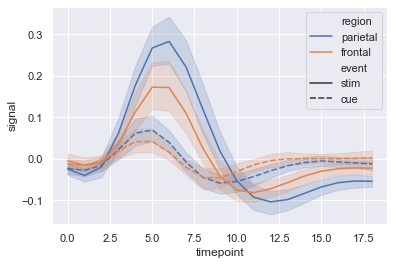

In [22]:
# Plot the responses for different events and regions 

sns.lineplot(x='timepoint', y = 'signal', hue ='region', style='event', data= fmri)

Plotting with Date Data  

In [24]:
import pandas as pd 
df = pd.DataFrame(dict(time= pd.date_range('2017-1-1', periods =500),
                       value = np.random.randn(500).cumsum()))        #Created a random data frame
df

,time,value
0,2017-01-01,-0.447129
1,2017-01-02,0.777379
2,2017-01-03,1.180871
3,2017-01-04,1.774449
4,2017-01-05,0.679537
...,...,...
495,2018-05-11,30.652279
496,2018-05-12,31.313961
497,2018-05-13,32.300313
498,2018-05-14,31.834158


C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


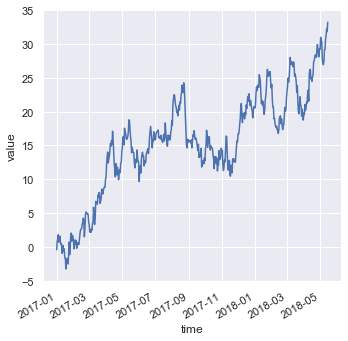

In [25]:
g = sns.relplot(x='time', y='value', kind ='line',data=df)
g.fig.autofmt_xdate()

SCATTER PLOT MATRIX

A scatter plot matrix is a grid (or matrix) of scatter plots used to visualize bivariate relationships between combinations of variables. Each scatter plot in the matrix visualizes the relationship between a pair of variables, allowing many relationships to be explored in one chart.

In [26]:
import seaborn as sns 
sns.set(style='ticks')

df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


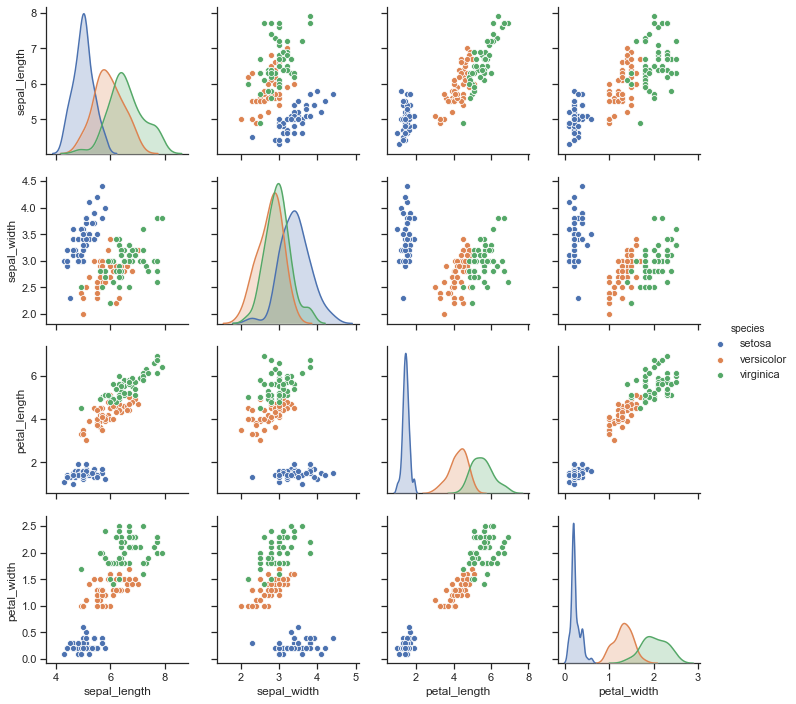

In [27]:
sns.pairplot(df, hue='species')

Scatter plot with Categorical and numerical semantics

In [28]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(style='whitegrid')

# Load the example diamonds data set 
df = sns.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


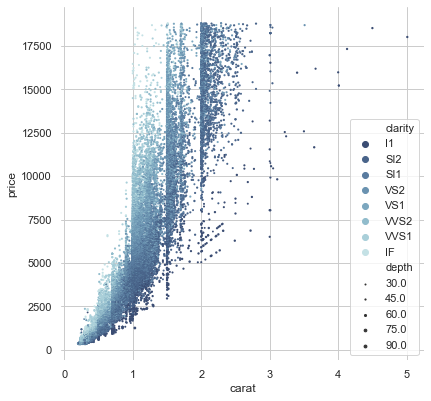

In [31]:
# draw a scatter plot while assigning point colors and sizes to different variable sin the dataset 

f , ax = plt.subplots(figsize = (6.5,6.5))
sns.despine(f, left=True, bottom = True)
clarity_ranking = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

sns.scatterplot(x='carat',y ='price', hue='clarity', size='depth', palette = 'ch:r=-.2,d=.3_r',
               hue_order= clarity_ranking, sizes=(1,8),
               linewidth =0, data= df, ax=ax)

HORIZONTAL BOX PLOT WITH OBSERVATIONS

Boxplots are a measure of how well distributed the data in a data set is. It divides the data set into three quartiles.

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set(style='ticks')

#Load the example datasetet planets
planets = sns.load_dataset('planets')
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


C:\Users\KIIT\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


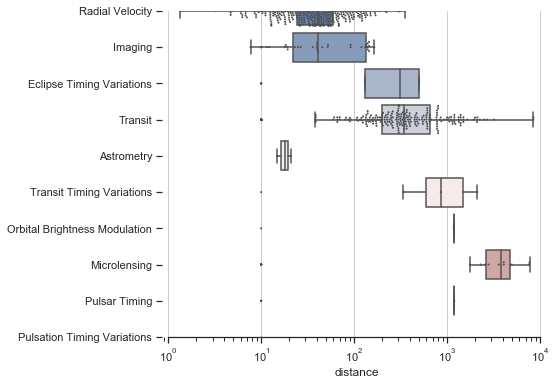

In [37]:
#Initialize the figure with a logarithmic x axis
f , ax = plt.subplots(figsize = (7,6))
ax.set_xscale('log')

#plot the orbital period with horizontal boxes 
sns.boxplot(x='distance', y = 'method', data= planets, whis=[0,100], palette = 'vlag')

#Add in points to show each observation
sns.swarmplot(x='distance', y ='method',data = planets,size=2, color='.3',linewidth=0)

# Tweak the visual presentation 
ax.xaxis.grid(True)
ax.set(ylabel='')
sns.despine(trim=True, left=True)


Linear Regression with marginal dstribution

In [38]:
import seaborn as sns
sns.set(style='darkgrid')
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


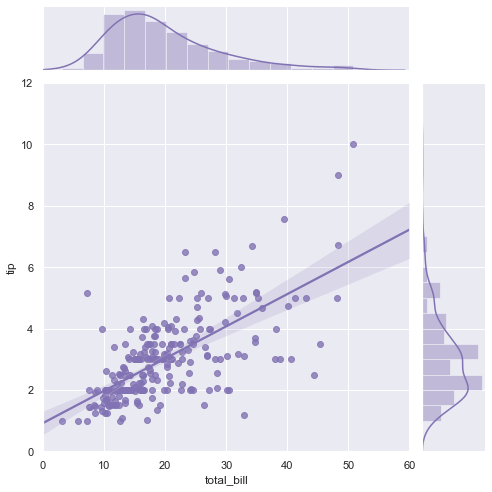

In [40]:
g = sns.jointplot('total_bill', 'tip',data = tips, kind ='reg', truncate=False,
                xlim=(0,60), ylim=(0,12), color='m', height=7)

Plotting on a large number of Facets

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='ticks')

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1,2 ,(20,5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(20), 5)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk], columns = ['position', 'step', 'walk'])
df

,position,step,walk
0,0,0,0
1,1,1,0
2,1,2,0
3,1,3,0
4,0,4,0
...,...,...,...
95,0,15,19
96,-1,16,19
97,0,17,19
98,1,18,19


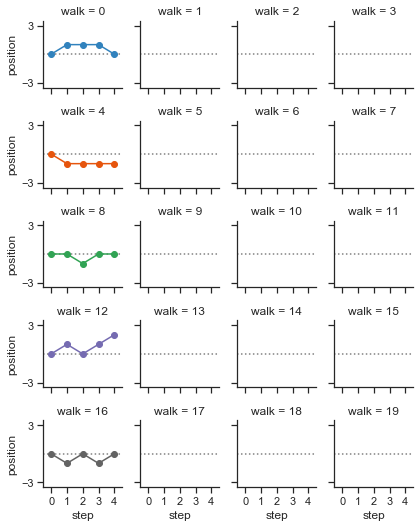

In [6]:
# Initialize a grid of plots with an axes for each walk
grid =sns.FacetGrid(df, col='walk', hue='walk', palette ='tab20c', col_wrap =4, height =1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y =0, ls=':', c='.5')

#Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, 'step', 'position', marker='o')

# Adjust the tick positions and labels
grid.set(xticks =np.arange(5), yticks = [-3, 3], xlim =(-.5 , 4.5 ), ylim = (-3.5, 3.5) )

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad = 1)

# Statistical visualization with Matplotlib


Creating Box Plots with custom built colors

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Random test data
np.random.seed(123)
all_data = [np.random.normal(0, std, 100) for std in range(1, 4)]
all_data

[array([-1.085631,  0.997345,  0.282978, -1.506295, -0.5786  ,  1.651437,
        -2.426679, -0.428913,  1.265936, -0.86674 , -0.678886, -0.094709,
         1.49139 , -0.638902, -0.443982, -0.434351,  2.20593 ,  2.186786,
         1.004054,  0.386186,  0.737369,  1.490732, -0.935834,  1.175829,
        -1.253881, -0.637752,  0.907105, -1.428681, -0.140069, -0.861755,
        -0.255619, -2.798589, -1.771533, -0.699877,  0.927462, -0.173636,
         0.002846,  0.688223, -0.879536,  0.283627, -0.805367, -1.727669,
        -0.3909  ,  0.573806,  0.338589, -0.01183 ,  2.392365,  0.412912,
         0.978736,  2.238143, -1.294085, -1.038788,  1.743712, -0.798063,
         0.029683,  1.069316,  0.890706,  1.754886,  1.495644,  1.069393,
        -0.772709,  0.794863,  0.314272, -1.326265,  1.417299,  0.807237,
         0.04549 , -0.233092, -1.198301,  0.199524,  0.468439, -0.831155,
         1.162204, -1.097203, -2.1231  ,  1.039727, -0.403366, -0.12603 ,
        -0.837517, -1.605963,  1.25523

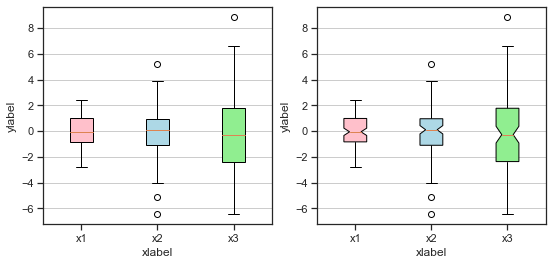

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = axes[0].boxplot(all_data,
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

# notch shape box plot
bplot2 = axes[1].boxplot(all_data,
                         notch=True,  # notch shape
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))], )
    ax.set_xlabel('xlabel')
    ax.set_ylabel('ylabel')

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])

plt.show()

Creating Error Bars

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)
print(x)
print(y)

[0.1 0.6 1.1 1.6 2.1 2.6 3.1 3.6]
[0.904837 0.548812 0.332871 0.201897 0.122456 0.074274 0.045049 0.027324]


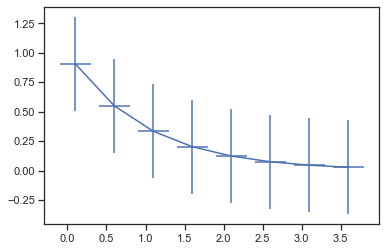

In [14]:
fig, ax = plt.subplots()
ax.errorbar(x, y, xerr=0.2, yerr=0.4)
plt.show()

Creating Histograms for cumulative distribution 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

np.random.seed(0)

mu = 200
sigma = 25
n_bins = 50
x = np.random.normal(mu, sigma, size=100)
x

array([244.101309, 210.00393 , 224.46845 , 256.02233 , 246.68895 ,
       175.568053, 223.75221 , 196.21607 , 197.419529, 210.264963,
       203.601089, 236.356838, 219.025943, 203.041875, 211.096581,
       208.341858, 237.351977, 194.871043, 207.826693, 178.647607,
       136.175255, 216.340465, 221.610905, 181.445874, 256.743866,
       163.640858, 201.143963, 195.320404, 238.31948 , 236.733969,
       203.873686, 209.454063, 177.805356, 150.480088, 191.302196,
       203.908724, 230.757267, 230.059496, 190.31683 , 192.442431,
       173.786176, 164.499552, 157.343245, 248.769385, 187.258695,
       189.048142, 168.680116, 219.437259, 159.652554, 194.681493,
       177.613336, 209.672562, 187.229872, 170.484195, 199.295444,
       210.708297, 201.662931, 207.561797, 184.141948, 190.931471,
       183.188489, 191.011171, 179.671343, 156.842935, 204.435654,
       189.955477, 159.245041, 211.569556, 177.317541, 201.298635,
       218.227264, 203.224573, 228.485017, 169.129354, 210.058

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


AttributeError: module 'matplotlib.mlab' has no attribute 'normpdf'

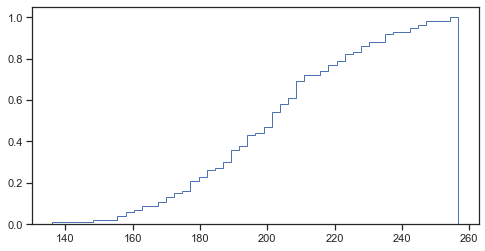

In [21]:
fig, ax = plt.subplots(figsize=(8, 4))                            # ERROR HERE PLOT IS NOT CORRECT, RESOLVE NORMPDF ERROR
                                                                  # USE DENSITY
# plot the cumulative histogram
n, bins, patches = ax.hist(x, n_bins, normed=1, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the expected distribution.
y = mlab.normpdf(bins, mu, sigma).cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

# Overlay a reversed cumulative histogram.
ax.hist(x, bins=bins, normed=1, histtype='step', cumulative=-1,
        label='Reversed emp.')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Annual rainfall (mm)')
ax.set_ylabel('Likelihood of occurrence')

plt.show()

CREATING VIOLIN PLOTS

A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

In [22]:
import random
import numpy as np
import matplotlib.pyplot as plt

# fake data
fs = 10  # fontsize
pos = [1, 2, 4, 5, 7, 8]
data = [np.random.normal(0, std, size=100) for std in pos]
data

[array([ 1.883151, -1.347759, -1.270485,  0.969397, -1.173123,  1.943621,
        -0.413619, -0.747455,  1.922942,  1.480515,  1.867559,  0.906045,
        -0.861226,  1.910065, -0.268003,  0.802456,  0.947252, -0.15501 ,
         0.614079,  0.922207,  0.376426, -1.099401,  0.298238,  1.326386,
        -0.694568, -0.149635, -0.435154,  1.849264,  0.672295,  0.407462,
        -0.769916,  0.539249, -0.674333,  0.031831, -0.635846,  0.676433,
         0.576591, -0.208299,  0.396007, -1.093062, -1.491258,  0.439392,
         0.166673,  0.635031,  2.383145,  0.944479, -0.912822,  1.117016,
        -1.315907, -0.461585, -0.068242,  1.713343, -0.744755, -0.826439,
        -0.098453, -0.663478,  1.126636, -1.079932, -1.147469, -0.43782 ,
        -0.498032,  1.929532,  0.949421,  0.087551, -1.225436,  0.844363,
        -1.000215, -1.544771,  1.18803 ,  0.316943,  0.920859,  0.318728,
         0.856831, -0.651026, -1.034243,  0.681595, -0.80341 , -0.68955 ,
        -0.455533,  0.017479, -0.35399

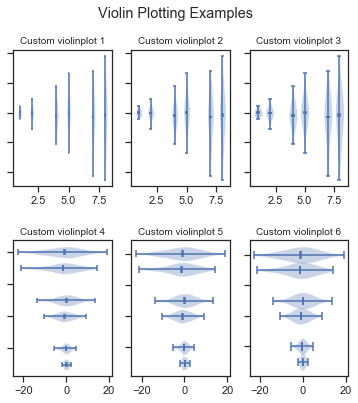

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6))

axes[0, 0].violinplot(data, pos, points=20, widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True)
axes[0, 0].set_title('Custom violinplot 1', fontsize=fs)

axes[0, 1].violinplot(data, pos, points=40, widths=0.5,
                      showmeans=True, showextrema=True, showmedians=True,
                      bw_method='silverman')
axes[0, 1].set_title('Custom violinplot 2', fontsize=fs)

axes[0, 2].violinplot(data, pos, points=60, widths=0.7, showmeans=True,
                      showextrema=True, showmedians=True, bw_method=0.5)
axes[0, 2].set_title('Custom violinplot 3', fontsize=fs)

axes[1, 0].violinplot(data, pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=True)
axes[1, 0].set_title('Custom violinplot 4', fontsize=fs)

axes[1, 1].violinplot(data, pos, points=100, vert=False, widths=0.9,
                      showmeans=True, showextrema=True, showmedians=True,
                      bw_method='silverman')
axes[1, 1].set_title('Custom violinplot 5', fontsize=fs)

axes[1, 2].violinplot(data, pos, points=200, vert=False, widths=1.1,
                      showmeans=True, showextrema=True, showmedians=True,
                      bw_method=0.5)
axes[1, 2].set_title('Custom violinplot 6', fontsize=fs)

for ax in axes.flatten():
    ax.set_yticklabels([])

fig.suptitle("Violin Plotting Examples")
fig.subplots_adjust(hspace=0.4)
plt.show()